In [16]:
import pandas as pd
import json
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Sort Data by Timestamp
tweet_raw_file_dir = "C:\\Users\\jesse\\Desktop\\DDHW2\\Final\\merged_data.csv"
df = pd.read_csv(tweet_raw_file_dir)

# Convert the "Timestamp" column to datetime format, allowing inference of formats
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Drop rows with invalid dates (NaT)
df = df.dropna(subset=['Timestamp'])

# Sort the DataFrame by Timestamp
df = df.sort_values(by='Timestamp')
df.head(len(df))

,Timestamp,Username,Tweet Content,Retweets,Likes,Replies,Unnamed: 6,Unnamed: 7,scores
2624,2023-10-17,Tesla,Tesla Full Self-Driving capability demo in Aus...,3969,21262,1953,NaN,NaN,0.523782
2625,2023-10-18,Tesla,Q3 Shareholder Update → https://t.co/sXBSeLibS...,2859,16715,1480,NaN,NaN,0.495593
2626,2023-10-18,elonmusk,RT @Tesla: Q3 Shareholder Update → https://t.c...,2855,0,0,NaN,NaN,0.267584
2627,2023-10-18,elonmusk,RT @Tesla: Tesla Full Self-Driving capability ...,3969,0,0,NaN,NaN,0.183875
2628,2023-10-19,elonmusk,@SawyerMerritt @Tesla Cool,110,2236,183,NaN,NaN,0.827263
...,...,...,...,...,...,...,...,...,...
4639,2023-12-16,NaN,@soccer_mario11 I'm amazed by Tesla's constant...,0,0,0,NaN,NaN,0.952863
4638,2023-12-16,NaN,Chainlink Аirdrop➡️https://t.co/mAzpoAB3at\n\n...,0,0,0,NaN,NaN,0.012671
4637,2023-12-16,NaN,Check this➡️https://t.co/0YF4GIJVJd\n\n@meta_t...,0,0,0,NaN,NaN,-0.000702
4648,2023-12-16,NaN,@soccer_mario11 I'm amazed by Tesla's constant...,0,0,0,NaN,NaN,0.952863


In [17]:
import pandas as pd

# Load your data
# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Convert 'Likes', 'Replies', 'Retweets', and 'scores' columns to numeric, replacing non-numeric values with NaN
df[['Likes', 'Replies', 'Retweets', 'scores']] = df[['Likes', 'Replies', 'Retweets', 'scores']].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0
df[['Likes', 'Replies', 'Retweets', 'scores']] = df[['Likes', 'Replies', 'Retweets', 'scores']].fillna(0)

# Calculate Sentiment Index
df['Sentiment_Index'] = (df['Likes'] + df['Replies'] + df['Retweets']) * df['scores']

# Extract the date from the 'Timestamp' column
df['Date'] = df['Timestamp'].dt.date

# Group the data by date and sum the 'Sentiment_Index' for each date
processed_data = df.groupby('Date')['Sentiment_Index'].sum().reset_index()

# Specify the target directory and filename for the processed data
target_directory = "C:\\Users\\jesse\\Desktop\\DDHW2\\Final\\"
final_file_path = target_directory + 'processed_sentiment_index_by_date.csv'

# Save the processed data to a new CSV file without the index column
processed_data.to_csv(final_file_path, index=False)

# Read the processed data back into a DataFrame (optional)
df = pd.read_csv(final_file_path)
df.head(len(df))


,Date,Sentiment_Index
0,2023-10-17,14238.488671
1,2023-10-18,11927.971221
2,2023-10-19,2092.147518
3,2023-10-22,55211.291131
4,2023-10-23,1227.502952
5,2023-10-24,15822.927552
6,2023-10-25,-4759.392309
7,2023-10-26,-6042.336875
8,2023-10-27,-5279.059179
9,2023-10-28,248.068204


In [18]:
TSLA_price_file_dir = "C:\\Users\\jesse\\Desktop\\DDHW2\\Final\\TSLA.csv"
df = pd.read_csv(TSLA_price_file_dir)
df.head(len(df))

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
1,2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800
2,2023-10-19,225.949997,230.610001,216.779999,220.110001,220.110001,170772700
3,2023-10-20,217.009995,218.860001,210.419998,211.990005,211.990005,137734000
4,2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
5,2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100
6,2023-10-25,215.880005,220.100006,212.199997,212.419998,212.419998,107065100
7,2023-10-26,211.320007,214.800003,204.880005,205.759995,205.759995,115112600
8,2023-10-27,210.600006,212.410004,205.770004,207.300003,207.300003,94881200
9,2023-10-30,209.279999,210.880005,194.669998,197.360001,197.360001,136448200


In [19]:
# Step 5: Merge Sentiment_Index with Price_Next_Day

# Read data from both files
sentiment_df = pd.read_csv(final_file_path)
TSLA_df = pd.read_csv(TSLA_price_file_dir)

# Convert date columns to datetime format for consistency
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])
TSLA_df['Date'] = pd.to_datetime(TSLA_df['Date'])

# Select only the 'Date' and 'Open' columns from TSLA_df
TSLA_subset = TSLA_df[['Date', 'Open']]

# Merge data based on the 'Date' column
merged_df = sentiment_df.merge(TSLA_subset, on='Date', how='left')

# Overwrite the existing file with the merged data
merged_df.to_csv(final_file_path, index=False)

# Read the modified file back into a DataFrame (optional)
df = pd.read_csv(final_file_path)
df.head(len(df))


,Date,Sentiment_Index,Open
0,2023-10-17,14238.488671,250.100006
1,2023-10-18,11927.971221,252.699997
2,2023-10-19,2092.147518,225.949997
3,2023-10-22,55211.291131,NaN
4,2023-10-23,1227.502952,210.000000
5,2023-10-24,15822.927552,216.500000
6,2023-10-25,-4759.392309,215.880005
7,2023-10-26,-6042.336875,211.320007
8,2023-10-27,-5279.059179,210.600006
9,2023-10-28,248.068204,NaN


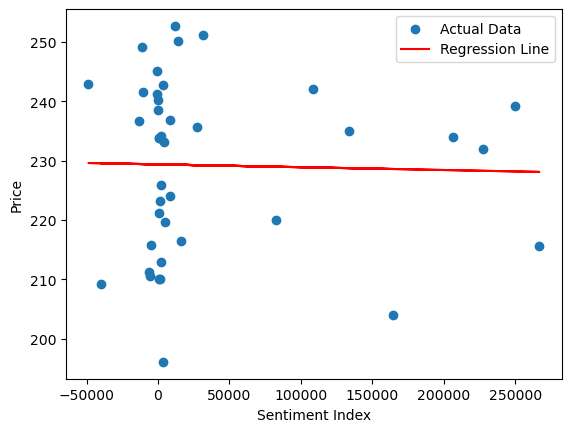

In [21]:
# Read your dataset into a pandas DataFrame
data = pd.read_csv(final_file_path)

# Drop rows with NaN values in 'Sentiment_Index' or 'Open' columns
data = data.dropna(subset=['Sentiment_Index', 'Open'])

# Define the independent (X) and dependent (y) variables
X = data['Sentiment_Index'].values.reshape(-1, 1)
y = data['Open'].values

# Check if there are still valid data points after dropping NaN values
if len(X) > 0:
    # Create a linear regression model
    model = LinearRegression()

    # Fit the model to the data
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Visualize the data and regression line
    plt.scatter(X, y, label='Actual Data')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.xlabel('Sentiment Index')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
else:
    print("No valid data points after dropping NaN values.")


In [22]:
beta_0 = model.intercept_
beta_1 = model.coef_[0]
epsilon = y - y_pred

print(f'Intercept (beta_0): {beta_0}')
print(f'Slope (beta_1): {beta_1}')
print(f'Residuals (epsilon): {epsilon}')

Intercept (beta_0): 229.38618536310904
Slope (beta_1): -4.750311181609623e-06
Residuals (epsilon): [ 20.78145789  23.37047321  -3.42625001 -19.38035434 -12.81102153
 -13.52878896 -18.09488134 -18.81125654 -20.29730831 -33.2508002
 -24.5659779  -16.40736189  -8.23257785  -5.36538527  -9.01241126
  -6.22945642  -9.6136104  -19.35355586 -12.51844231  11.08922998
   3.69441755   5.63328963   6.29022729  13.16988654   4.36766872
   7.54302622   7.23042382  19.77018407  15.7517698    3.77331937
   6.49481866   4.4866077   13.30249529  12.11371989  10.88250795
  13.37044785   9.16504334   4.81406808  11.82968131  21.97467624]
